In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.time import Time
import time
from matplotlib.ticker import ScalarFormatter

In [2]:
path_lightcurves = os.path.join('Catalogo_QSO', 'QSO_S82')
path_m_smbh = os.path.join('Catalogo_QSO', 'DB_QSO_S82.dat')
archivos_LC = os.listdir(path_lightcurves) #names per light curve

In [3]:
with open(path_m_smbh, 'r') as file:
    line_list = file.readlines()
    objects = dict()
    for line in line_list[2:]:
        data = line.strip().split(' ')
        while ' ' in data:
            data.remove(' ')
        while '' in data:
            data.remove('')
        #objetos[datos[0]] = datos[6] #dbID -> z
        if float(data[7]) > 0.0:
            objects[data[0]] = 10 ** float(data[7]) #dbID -> mass

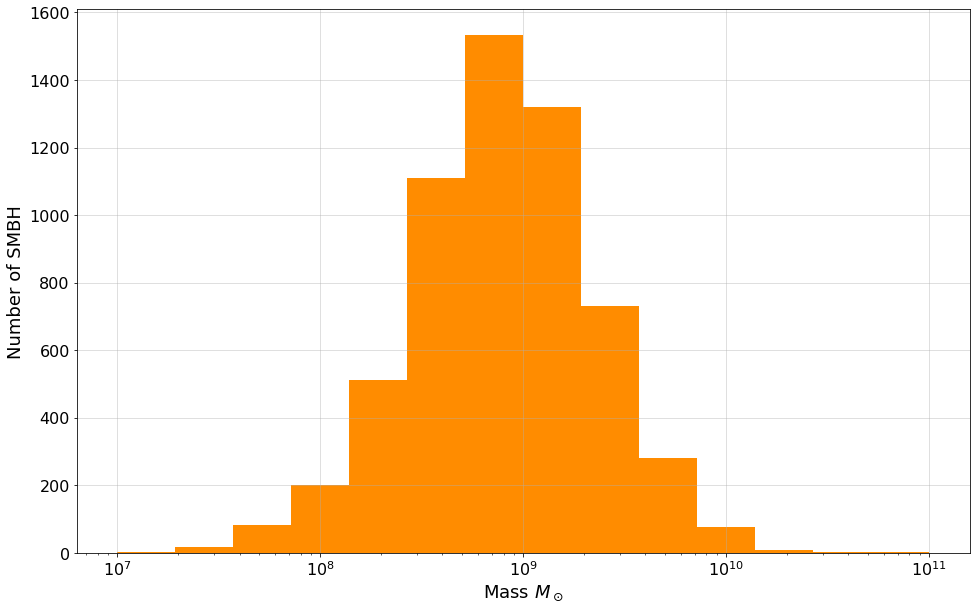

In [4]:
mass_dist = np.array(list(objects.values()))
fig = plt.figure(figsize=(16,10))
plt.hist(mass_dist, bins=np.logspace(7,11,15), color='darkorange')
plt.xscale('log')
plt.grid(alpha=0.5)
plt.style.use('dark_background')
plt.xlabel(r'Mass $M_\odot$', fontsize=18)
plt.ylabel('Number of SMBH', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [5]:
def R(M):
    
    m = M * 2e30
    G = 6e-11 #N m s^2
    c = 3e8 #m/s
    
    return (2 * G * m / c ** 2) / (1.495e11) #in AU

def M(R):
    
    G = 6e-11 #N m s^2
    c = 3e8 #m/s
    
    return R  * c ** 2 / (2  * G) * (1.495e11) / 2e30 #in solar mass

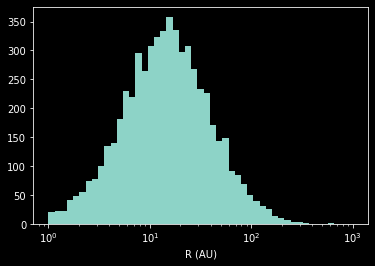

In [6]:
r_dist = R(mass_dist)
plt.hist(r_dist, bins=np.logspace(0,3,50))
plt.xscale('log')
plt.xlabel('R (AU)')
plt.show()

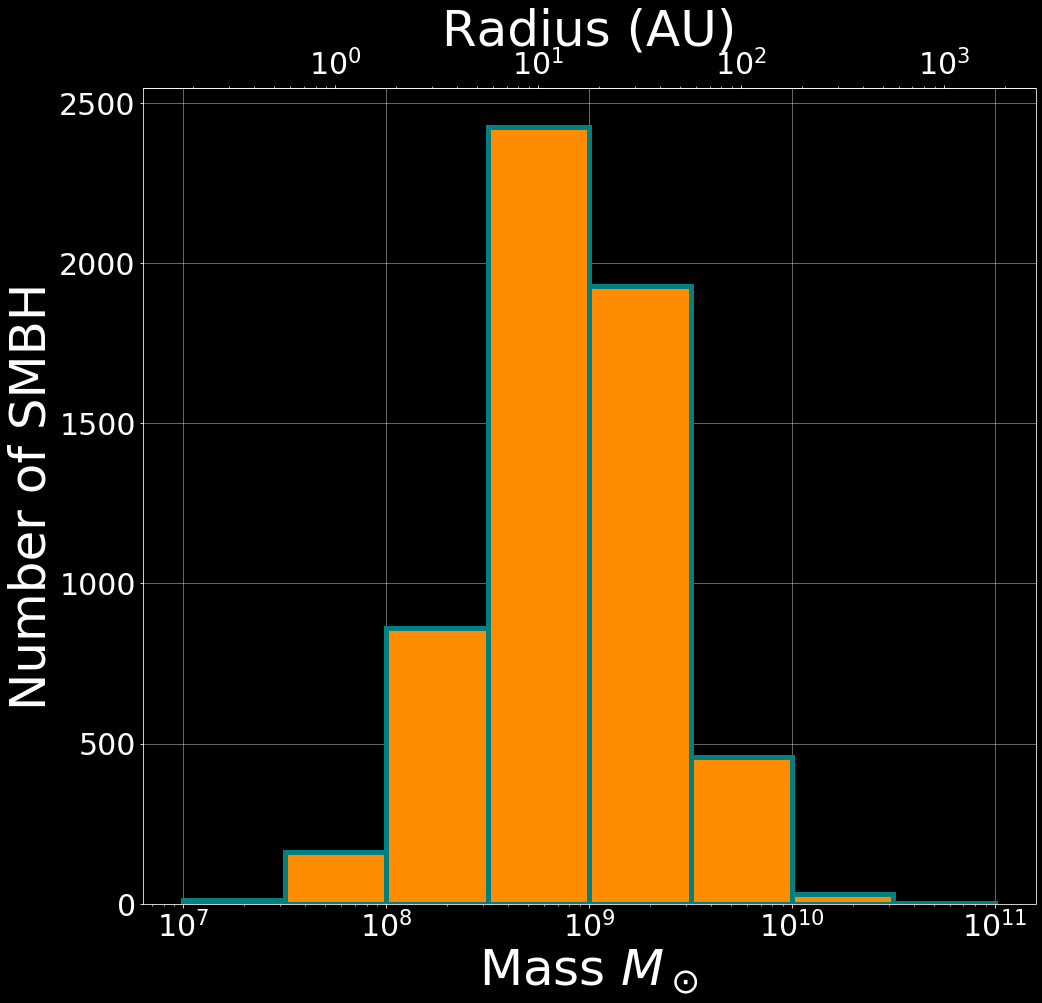

In [60]:
mass_dist = np.array(list(objects.values()))
fig , ax = plt.subplots(1, 1, figsize=(16,15))
ax.hist(mass_dist, bins=np.logspace(7,11,9), color='darkorange', 
            edgecolor='teal', linewidth=5)
ax.set_xscale('log')
ax.grid(alpha=0.5)
plt.style.use('dark_background')
ax.set_xlabel(r'Mass $M_\odot$', fontsize=50)
ax.set_ylabel('Number of SMBH', fontsize=50)
ax.tick_params(labelsize=30)
ax.set_axisbelow(True)

secax = ax.secondary_xaxis('top', functions=(R, M))
secax.set_xlabel('Radius (AU)', fontsize=50)
#secax.set_xticks([1, 10, 100, 1000])
#secax.set_xticklabels(['1', '10', '100', '1000'])
secax.tick_params(labelsize=30)

secax.xaxis.set_major_formatter(ScalarFormatter())

plt.savefig('Plot.png', dpi=500)
plt.show()


Get smallest one, largestone, compare. Get light curves

In [32]:
print('R min: ', min(r_dist)/50, ' Suns')
print('R max: ', max(r_dist)/50, ' Solar systems') 

R min:  0.005947816142880051  Suns
R max:  32.76102908302623  Solar systems


In [9]:
M(min(r_dist))

16672472.125510644

In [10]:
R(M(min(r_dist)))

0.29739080714400257

In [25]:
min_bh = list(objects.keys())[list(objects.values()).index(min(objects.values()))]
max_bh = list(objects.keys())[list(objects.values()).index(max(objects.values()))]

In [26]:
min_bh

'1211568'

In [27]:
max_bh

'2492819'

In [31]:
R(objects[min_bh])

0.29739080714400257

In [35]:
np.log10(objects[max_bh])

10.963

In [45]:
R(max(objects.values()))/0.004

409512.86353782786

In [49]:
a = np.histogram(mass_dist, bins=np.logspace(7,11,5))

In [50]:
a

(array([ 172, 3286, 2385,   33]),
 array([1.e+07, 1.e+08, 1.e+09, 1.e+10, 1.e+11]))

In [59]:
172 / len(objects) *100

2.9271613342409806

In [56]:
3286/len(objects) * 100

55.92239618788292

In [55]:
2385/len(objects) * 100

40.58883594281824

In [57]:
33/len(objects) * 100

0.5616065350578625